In [70]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)         # show all columns
pd.set_option('display.expand_frame_repr', False)  # disable wrapping


In [71]:
df = pd.read_csv('train.csv')
print(df.head())


   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [ ]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


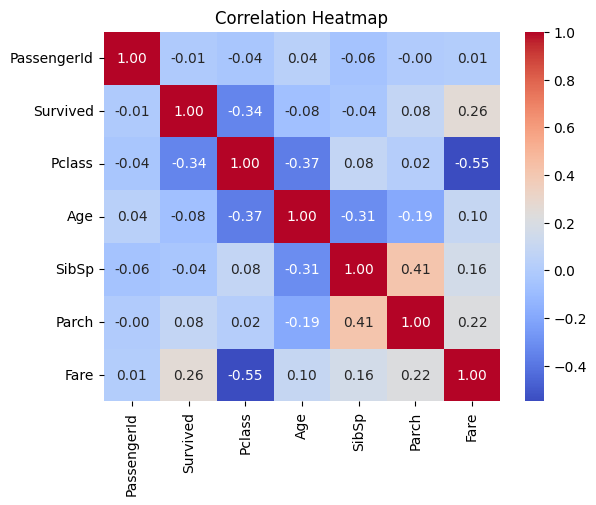

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [74]:
df ['Sex'] = df['Sex'].map({'male': 0 , 'female': 1})
print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    0  35.0      0      0            373450   8.0500   NaN        S


In [76]:
# Extract titles from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles to a common category
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Encode titles numerically
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
df['Title'] = df['Title'].map(title_mapping)

print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Title
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      1
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      3
4            5         0       3                           Allen, Mr. William Henry    0  35.0      0      0            373450   8.0500   NaN        S      1


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/yn/2lkq6t6d0ns6d9pql61jch8h0000gn/T/ipykernel_62562/610567471.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Add 1 to include the passenger themselves

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Title  FamilySize  IsAlone
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      1           2        0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3           2        0
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2           1        1
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      3           2        0
4            5         0       3                           Allen, Mr. William Henry    0  35.0      0    

In [21]:
# Fill missing Age values with the median age grouped by Pclass and Sex
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

# Bin ages into categories
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=[0, 1, 2, 3, 4])

print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Title  FamilySize  IsAlone AgeBin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      1           2        0      2
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3           2        0      3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2           1        1      2
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      3           2        0      2
4            5         0       3                           Allen, Mr. 

In [22]:
# Bin fares into categories
df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=[0, 1, 2, 3])

print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Title  FamilySize  IsAlone AgeBin FareBin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      1           2        0      2       0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3           2        0      3       3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2           1        1      2       1
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      3           2        0      2       3
4            5         0      

In [23]:
# Check for missing values in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
IsAlone          0
AgeBin           0
FareBin          0
dtype: int64


In [24]:
# Drop rows where Embarked is missing
df = df.dropna(subset=['Embarked'])
print(df.isnull().sum())
print(df.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
IsAlone          0
AgeBin           0
FareBin          0
dtype: int64
   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Title  FamilySize  IsAlone AgeBin FareBin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      1           2        0      2       0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3           2        0      3       3
2            3         1       3                             Heikkinen, Miss. Lain

In [25]:
# 1) Flag presence
df['HasCabin'] = df['Cabin'].notna().astype(int)

# 2) Extract deck (first letter) & fill missing as “U”
df['Deck'] = df['Cabin'].fillna('U').str[0]

# 3) Group rare decks (optional)
deck_counts = df['Deck'].value_counts()
rare_decks = deck_counts[deck_counts < 10].index
df['Deck'] = df['Deck'].replace(rare_decks, 'Other')

# 4) One-hot encode
deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck')
df = pd.concat([df, deck_dummies], axis=1)

print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Title  FamilySize  IsAlone AgeBin FareBin  HasCabin Deck  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_Other  Deck_U
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      1           2        0      2       0         0    U   False   False   False   False   False   False       False    True
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3           2        0      3       3         1    C   False   False    True   False   False   False       False   False
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2           1

In [26]:
# 1. Split prefix & number
df['Ticket'] = df['Ticket'].fillna('')
parts = df['Ticket'].str.split()
df['TicketPrefix']  = parts.str[:-1].str.join(' ')
df['TicketNumber']  = parts.str[-1].where(parts.str[-1].str.isnumeric(), None)

# 2. HasPrefix flag
df['HasTicketPrefix'] = (df['TicketPrefix'] != '').astype(int)

# 3. Group top prefixes
prefix_counts = df['TicketPrefix'].value_counts()
top = prefix_counts.nlargest(10).index
df['TicketPrefix2'] = df['TicketPrefix'].where(df['TicketPrefix'].isin(top), 'Other')
prefix_dummies = pd.get_dummies(df['TicketPrefix2'], prefix='TktPre')

# 4. Numeric ticket bins
df['TicketNumber'] = df['TicketNumber'].astype(float).fillna(0)
df['TicketNum_qbin'] = pd.qcut(df['TicketNumber'], 10, labels=False)

# 5. Ticket-group features
sizes = df.groupby('Ticket')['PassengerId'].transform('count')
df['TicketGroupSize'] = sizes
df['IsGroupTicket'] = (sizes > 1).astype(int)

# 6. Assemble & drop raw
df = pd.concat([df, prefix_dummies], axis=1)
df.drop(columns=['Ticket','TicketPrefix','TicketPrefix2'], inplace=True)

print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch     Fare Cabin Embarked  Title  FamilySize  IsAlone AgeBin FareBin  HasCabin Deck  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_Other  Deck_U  TicketNumber  HasTicketPrefix  TicketNum_qbin  TicketGroupSize  IsGroupTicket  TktPre_  TktPre_A/5  TktPre_A/5.  TktPre_C.A.  TktPre_CA.  TktPre_Other  TktPre_PC  TktPre_SOTON/O.Q.  TktPre_SOTON/OQ  TktPre_STON/O 2.  TktPre_W./C.
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0   7.2500   NaN        S      1           2        0      2       0         0    U   False   False   False   False   False   False       False    True       21171.0                1               3                1              0    False        True        False        False       False         False      False              False            False             False         False
1            2      

In [27]:
# Map A/B→Upper, C/D/E→Middle, F→Lower, U→None
mapping = {**dict.fromkeys(list("AB"),"Upper"),
           **dict.fromkeys(list("CDE"),"Middle"),
           "F":"Lower","U":"None"}
df["DeckGroup"] = df["Cabin"].fillna("U").str[0].map(mapping)
df = pd.concat([df, pd.get_dummies(df["DeckGroup"], prefix="Deck")], axis=1)
print(df.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch     Fare Cabin Embarked  Title  FamilySize  IsAlone AgeBin FareBin  HasCabin Deck  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_Other  Deck_U  TicketNumber  HasTicketPrefix  TicketNum_qbin  TicketGroupSize  IsGroupTicket  TktPre_  TktPre_A/5  TktPre_A/5.  TktPre_C.A.  TktPre_CA.  TktPre_Other  TktPre_PC  TktPre_SOTON/O.Q.  TktPre_SOTON/OQ  TktPre_STON/O 2.  TktPre_W./C. DeckGroup  Deck_Lower  Deck_Middle  Deck_None  Deck_Upper
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0   7.2500   NaN        S      1           2        0      2       0         0    U   False   False   False   False   False   False       False    True       21171.0                1               3                1              0    False        True        False        False       False         False      False              False            

In [30]:
print(df.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'HasCabin', 'Deck', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_Other', 'Deck_U', 'TicketNumber', 'HasTicketPrefix', 'TicketNum_qbin', 'TicketGroupSize', 'IsGroupTicket', 'TktPre_', 'TktPre_A/5', 'TktPre_A/5.', 'TktPre_C.A.', 'TktPre_CA.', 'TktPre_Other', 'TktPre_PC', 'TktPre_SOTON/O.Q.', 'TktPre_SOTON/OQ', 'TktPre_STON/O 2.', 'TktPre_W./C.', 'DeckGroup', 'Deck_Lower', 'Deck_Middle', 'Deck_None', 'Deck_Upper']


In [31]:
to_drop = [
    'PassengerId', 'Name',      # identifiers
    'Cabin', 'Deck',            # raw cabin/text
    'TicketNumber',             # raw ticket num
    # raw age/fare if you use bins:
    'Age', 'Fare',
    # drop duplicate deck encodings (choose one):
    'Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_Other','Deck_U',
    # keep only grouped deck dummies: ['Deck_Lower','Deck_Middle','Deck_Upper','Deck_None']
    # drop ticket-prefix columns you merged:
    'TktPre_','TktPre_A/5','TktPre_A/5.','TktPre_C.A.','TktPre_CA.',
    'TktPre_SOTON/O.Q.','TktPre_SOTON/OQ','TktPre_STON/O 2.','TktPre_W./C.'
    # keep only your chosen top-N prefix dummies, e.g. ['TktPre_PC','TktPre_Other']
]
df_model = df.drop(columns=to_drop)

print(df.head())


   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch     Fare Cabin Embarked  Title  FamilySize  IsAlone AgeBin FareBin  HasCabin Deck  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_Other  Deck_U  TicketNumber  HasTicketPrefix  TicketNum_qbin  TicketGroupSize  IsGroupTicket  TktPre_  TktPre_A/5  TktPre_A/5.  TktPre_C.A.  TktPre_CA.  TktPre_Other  TktPre_PC  TktPre_SOTON/O.Q.  TktPre_SOTON/OQ  TktPre_STON/O 2.  TktPre_W./C. DeckGroup  Deck_Lower  Deck_Middle  Deck_None  Deck_Upper
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0   7.2500   NaN        S      1           2        0      2       0         0    U   False   False   False   False   False   False       False    True       21171.0                1               3                1              0    False        True        False        False       False         False      False              False            

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
drop_cols = ['Name','Cabin','Deck','DeckGroup','Embarked']  # plus any others you haven’t encoded
X_train = X_train.drop(columns=drop_cols)
X_val   = X_val.drop(columns=drop_cols)


In [35]:
# Replace each bin category with its integer code
for col in ['AgeBin','FareBin']:
    X_train[col] = X_train[col].cat.codes
    X_val[col]   = X_val[col].cat.codes


In [36]:
allowed = ['int64','float64','bool']
print(X_train.dtypes[~X_train.dtypes.isin(allowed)])
# should print an empty series


Age                  float64
Fare                 float64
AgeBin                  int8
FareBin                 int8
Deck_A                  bool
Deck_B                  bool
Deck_C                  bool
Deck_D                  bool
Deck_E                  bool
Deck_F                  bool
Deck_Other              bool
Deck_U                  bool
TicketNumber         float64
TktPre_                 bool
TktPre_A/5              bool
TktPre_A/5.             bool
TktPre_C.A.             bool
TktPre_CA.              bool
TktPre_Other            bool
TktPre_PC               bool
TktPre_SOTON/O.Q.       bool
TktPre_SOTON/OQ         bool
TktPre_STON/O 2.        bool
TktPre_W./C.            bool
Deck_Lower              bool
Deck_Middle             bool
Deck_None               bool
Deck_Upper              bool
dtype: object


In [45]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical=False   # categorical dtypes are now gone
)
xgb_model.fit(X_train, y_train)


/Users/I522775/Library/Python/3.12/lib/python/site-packages/xgboost/training.py:183: UserWarning: [17:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on your validation set
y_pred = xgb_model.predict(X_val)

# Compute accuracy
acc = accuracy_score(y_val, y_pred)
print(f"XGBoost Accuracy: {acc:.4f}")

# (Optional) More detail on precision/recall
print(classification_report(y_val, y_pred))


XGBoost Accuracy: 0.7978
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [47]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Load the model
loaded_model = joblib.load('xgboost_model.pkl')

In [48]:
df_test = pd.read_csv('test.csv')
print(df_test.head())


   PassengerId  Pclass                                          Name     Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked
0          892       3                              Kelly, Mr. James    male  34.5      0      0   330911   7.8292   NaN        Q
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   363272   7.0000   NaN        S
2          894       2                     Myles, Mr. Thomas Francis    male  62.0      0      0   240276   9.6875   NaN        Q
3          895       3                              Wirz, Mr. Albert    male  27.0      0      0   315154   8.6625   NaN        S
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1  3101298  12.2875   NaN        S


In [50]:
# after preprocessing, this was your training matrix
print(X_train.columns.tolist())
# → ['Pclass','Sex','SibSp','Parch','FamilySize','IsAlone','AgeBin','FareBin',
#    'HasCabin','Deck_Lower','Deck_Middle','Deck_Upper','Deck_None',
#    'HasTicketPrefix','TicketNum_qbin','TicketGroupSize',
#    'TktPre_PC','TktPre_Other', …]


['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin', 'HasCabin', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_Other', 'Deck_U', 'TicketNumber', 'HasTicketPrefix', 'TicketNum_qbin', 'TicketGroupSize', 'IsGroupTicket', 'TktPre_', 'TktPre_A/5', 'TktPre_A/5.', 'TktPre_C.A.', 'TktPre_CA.', 'TktPre_Other', 'TktPre_PC', 'TktPre_SOTON/O.Q.', 'TktPre_SOTON/OQ', 'TktPre_STON/O 2.', 'TktPre_W./C.', 'Deck_Lower', 'Deck_Middle', 'Deck_None', 'Deck_Upper']


In [68]:
def preprocess(df):
    # 1. Title
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    
    # 2. Family features
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone']    = (df['FamilySize'] == 1).astype(int)
    
    # 3. Age binning (use same bins you chose for train!)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,20,40,60,80], labels=False)
    
    # 4. Fare binning
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['FareBin'] = pd.qcut(df['Fare'], 5, labels=False)
    
    # 5. Cabin → HasCabin + Deck
    df['HasCabin'] = df['Cabin'].notna().astype(int)
    df['Deck']     = df['Cabin'].fillna('U').str[0]
    # group rare decks into 'O' if needed
    rare = df['Deck'].value_counts()[lambda s: s<10].index
    df['Deck'] = df['Deck'].replace(rare, 'O')
    
    # 6. One-hot encode Deck → Deck_A…Deck_U or your grouped Deck_Lower…Deck_None
    deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck')
    
    # 7. Ticket features
    df['Ticket'] = df['Ticket'].fillna('')
    parts = df['Ticket'].str.split()
    df['HasTicketPrefix'] = (parts.str[:-1].str.join(' ') != '').astype(int)
    df['TicketNumber']    = parts.str[-1].where(parts.str[-1].str.isnumeric(), 0).astype(int)
    df['TicketNum_qbin']  = pd.qcut(df['TicketNumber'], 10, labels=False, duplicates='drop')
    df['TicketGroupSize'] = df.groupby('Ticket')['PassengerId'].transform('count')
    df['IsGroupTicket']   = (df['TicketGroupSize'] > 1).astype(int)
    # top-N prefixes
    prefixes = parts.str[:-1].str.join(' ')
    top3 = prefixes.value_counts().nlargest(3).index
    df['TktPre3'] = prefixes.where(prefixes.isin(top3), 'Other')
    pre_dummies = pd.get_dummies(df['TktPre3'], prefix='TktPre')
    
    # 8. Assemble & drop raw columns
    keep = [
      'Pclass','Sex','SibSp','Parch','FamilySize','IsAlone',
      'AgeBin','FareBin','HasCabin','TicketNum_qbin',
      'HasTicketPrefix','TicketGroupSize','IsGroupTicket'
    ]
    df_final = pd.concat([df[keep], deck_dummies, pre_dummies], axis=1)
    
    return df_final


In [69]:
# after reading raw CSV, before any drops:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer